# Primer Examen 15%

A) Cargando el archivo JSON: 
* https://github.com/restrepo/anomaly/raw/main/solutions.json.gz

en Pandas

1) Adicione una columna nueva `'smax'` con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna '`solution`'
2) Adicione dos columnas nuevas: `'sum_s'` (`sum_s³`) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna '`solution`'
3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio. Optimize el rango de valores en el eje $x$ y en el eje $y$ del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: `plt.ylim(ymin,ymax)` ). Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo


In [79]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import optimize

In [5]:
archivo_json = "https://github.com/restrepo/anomaly/raw/main/solutions.json.gz" #Se guarda la ruta donde se encuentra el archivo JSON
archivo = pd.read_json(archivo_json) # Se lee el archivo JSON
df = pd.DataFrame(archivo) # Se convierte a un DataFrame

In [8]:
df

,l,k,solution,gcd,n
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11
...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8


In [14]:
df['smax'] = df['solution'].apply(lambda x: map(abs,x)).apply(max) #Se añade la nueva columna y se el valor máximo en valor absoluto
df.head()

,l,k,solution,gcd,n,smax
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8


In [19]:
#Se adicionan las dos columnas con las respectivas sum y suma^3
df['sum_s'] = df['solution'].apply(sum)
df['sum_s^3'] = df['sum_s']. apply(lambda x: x**3)
df.head()

,l,k,solution,gcd,n,smax,sum_s,sum_s^3
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6,0,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8,0,0


In [118]:
random.seed(1152708672) #Se fija una semilla con mi número de documento
x = random.randrange(0, 390073) # Se genera número aleatorio entre 0 y 390073
x

52410

In [119]:
coef = df.iloc[x]['solution'] #Ubico la columna y la fila que esta en el indice del número aleatorio anterior
coef

[4, -7, -12, 13, -19, 21, -22, 24, 30, -32]

In [120]:
coeffs = np.poly1d(coef) # Se obtiene el polinomio correspondiente de grado 9
print(coeffs)

   9     8      7      6      5      4      3      2
4 x - 7 x - 12 x + 13 x - 19 x + 21 x - 22 x + 24 x + 30 x - 32


In [123]:
#Raices del polinomio 
x1 = optimize.bisect(coeffs, a=-2,b = -1.5)
print ("raiz 1", x1) 
x2 = optimize.bisect(coeffs, a=-1.5,b = 0)
print ("raiz 2", x2) 
x3 = optimize.bisect(coeffs, a=0,b = 1)
print ("raiz 3", x3) 
x4 = optimize.bisect(coeffs, a=2,b = 3)
print ("raiz 4", x4)  
lista = [x1,x2,x3,x4]
arr = np.array (lista)


raiz 1 -1.928141979204156
raiz 2 -0.8566786965234314
raiz 3 1.0
raiz 4 2.5998446240173507


   9     8      7      6      5      4      3      2
4 x - 7 x - 12 x + 13 x - 19 x + 21 x - 22 x + 24 x + 30 x - 32


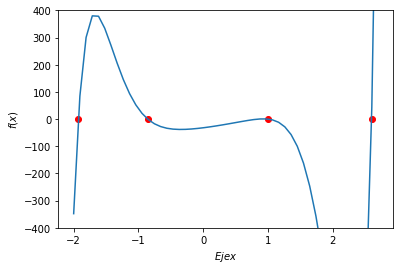

In [122]:
#Se gráfica la función del polinomio ante
x = np.linspace(-2,2.7) # Se cre el linspace lo suficientemente pequeño para poder visualizar las raices 

print(coeffs)
plt.figure()
plt.plot(arr, coeffs(arr),'o',color='red')
plt.xlabel('$Eje x$')
plt.ylabel('$f(x)$')
plt.plot(x,coeffs(x))
plt.ylim(-400,400)
plt.show()

B)

I) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5

II) De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones 
1. $$x\operatorname{e}^x=p\,, $$
2. $$\frac{\sin x}{x}=+p\,,$$
3. $$\frac{\sin x}{x}=-p\,,$$
4. $$\frac{\cos x}{x}=+p\,,$$
5. $$\frac{\cos x}{x}=-p\,,$$
III) Genere un número aleatorio entre 0 y 1 y asignelo al valor de $p$
IV) Encuentre la solución a la ecuación trascendental para el intervalo $x$ entre -10 y 10 y gráfique la correspondiente función trascendental y las correspondientes soluciones. . Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo.

A modo de nota curiosa: estas ecuaciones trascendentales están asociadas a soluciones de la ecuación de Schödinger en mecánica cuántica: https://doi.org/10.1080/14786435.2015.1081425

In [140]:
random.seed(1152708672) #Se fija una semilla con mi número de documento
num = random.randrange(1, 5) # Se genera número aleatorio entre 1 y 5
print(num)


p = random.randrange(0,1)
print(p)

1
0


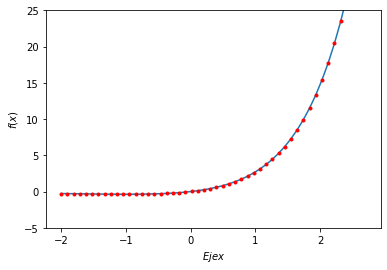

In [176]:
# Se escoge la función 1
# Se toma el valor de p = 0

func = lambda x0: x*np.exp(x)

#Se gráfica la función
inter = np.linspace(-10, 10)
plt.figure()
plt.plot(x,func(x))
plt.plot (x, func(x), 'o', color='red', markersize=3)
plt.xlabel('$Eje x$')
plt.ylabel('$f(x)$')
plt.ylim(-5,25)
plt.show()
